In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
file ='wine_quality_red.csv'
wine_data = pd.read_csv(file)
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [37]:
wine_data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [23]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
missing = pd.concat([wine_data.isnull().sum(), 100*wine_data.isnull().mean()], axis = 1)
missing.columns = ['count', '%']
missing.sort_values(by = ['count', '%'])

,count,%
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


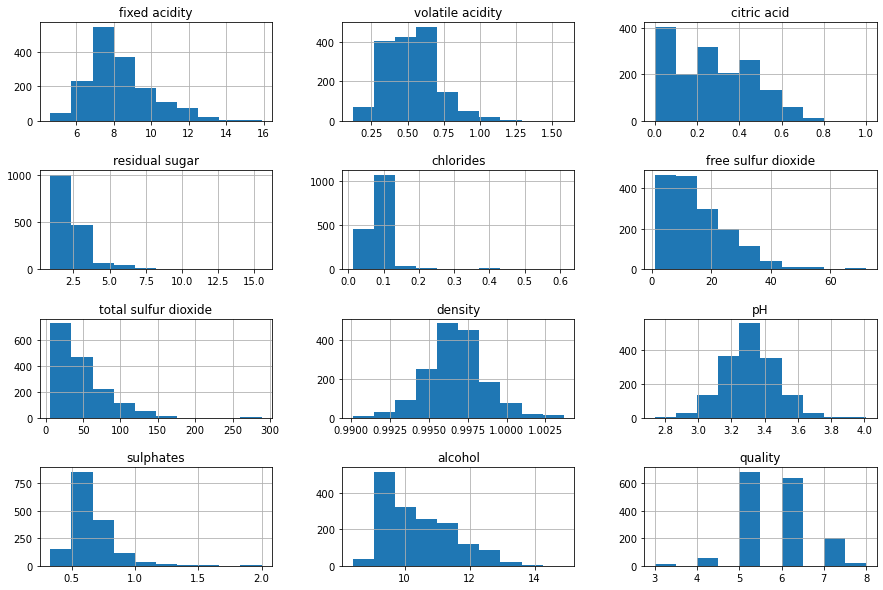

In [25]:
wine_data.hist(figsize = (15, 10))
plt.subplots_adjust(hspace=0.5)

<AxesSubplot:>

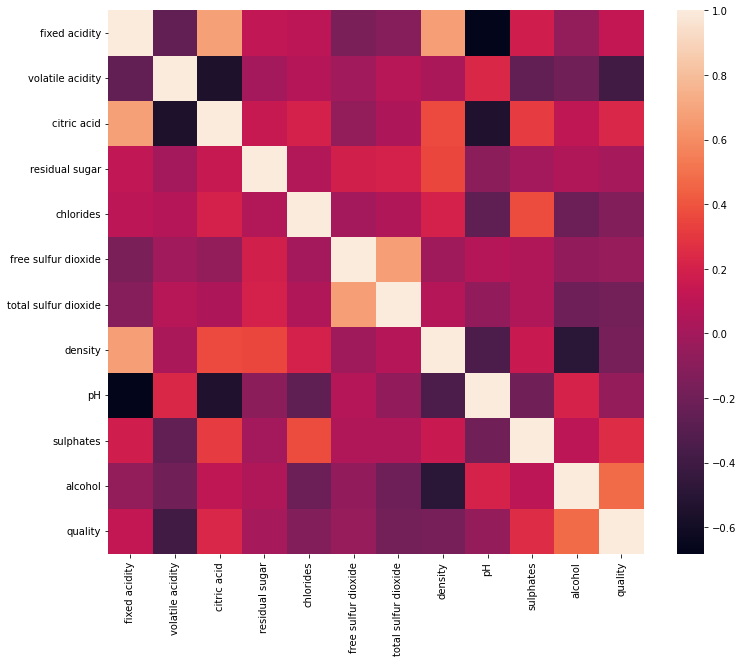

In [38]:
plt.subplots(figsize=(12,10))
sns.heatmap(wine_data.corr())

In [44]:
def scatterplots(columns, ncol=None, figsize=(15,8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns)/ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze = False)
    fig.subplots_adjust(wspace=0.5, hspace = 0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x='quality', y = col, data = wine_data, alpha = 0.5)
        ax.set(xlabel = 'Quality', ylabel = col)
    nsublots = nrow *ncol
    for empty in range(i+1, nsublots):
        axes.flatten()[empty].set_visible(False)

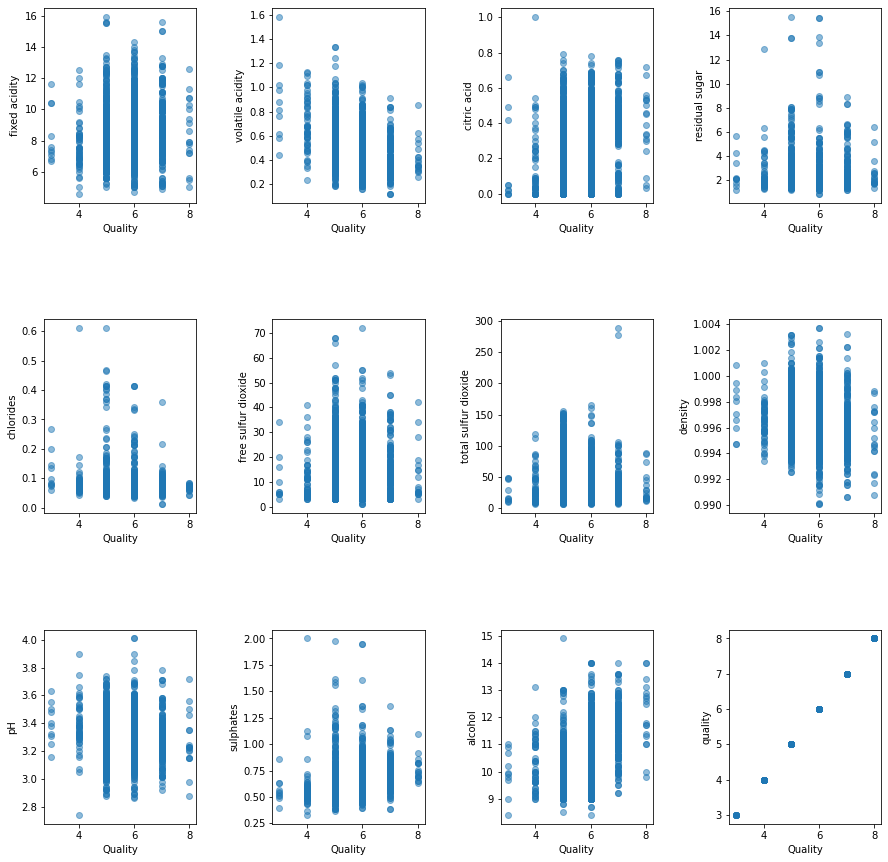

In [45]:
attributes = [column for column in wine_data.columns]
scatterplots(attributes, ncol=4, figsize = (15,15))

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

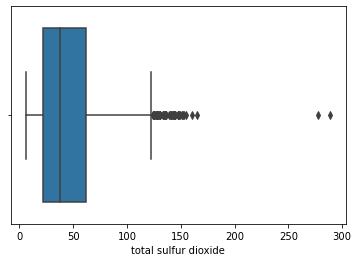

In [49]:
sns.boxplot(wine_data['total sulfur dioxide'])

C:\Users\jerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric acid'>

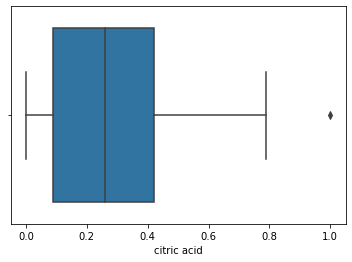

In [50]:
sns.boxplot(wine_data['citric acid'])

In [52]:
Q1 = np.percentile(wine_data['total sulfur dioxide'], 25, interpolation = 'midpoint')
Q3 = np.percentile(wine_data['total sulfur dioxide'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(wine_data['total sulfur dioxide'] >= (Q3 + 1.5*IQR))
lower = np.where(wine_data['total sulfur dioxide'] <= (Q1 - 1.5*IQR))

print(np.where(upper))


(array([  14,   15,   86,   88,   90,   91,   92,  109,  130,  145,  154,
        155,  156,  157,  188,  189,  190,  192,  201,  219,  313,  354,
        396,  400,  414,  415,  417,  463,  515,  522,  523,  591,  636,
        637,  649,  651,  672,  684,  693,  694,  723,  741,  771,  772,
        791,  852, 1079, 1081, 1131, 1244, 1400, 1401, 1419, 1493, 1496,
       1559, 1560, 1561], dtype=int64),)
